# **Install and import necessary packages**

In [4]:
import os
import json
import gdown
import pandas as pd
import numpy as np
import sys
!pip install scikit-surprise
from surprise import SVDpp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Dataset, Reader, SVD
!pip install git+https://github.com/microsoft/recommenders.git
from recommenders.evaluation.python_evaluation import (
    map, ndcg_at_k, precision_at_k, recall_at_k
)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.decomposition import TruncatedSVD
from surprise import Dataset, Reader
from sklearn.metrics import f1_score, precision_score, recall_score
from scipy.sparse import hstack
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162993 sha256=a44622deea790aecc4d00686393440c736d5d6a11745fecbe9cc7bddeba13d0d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
  Cloning https://github.com/microsoft/recommenders.git to /tmp/pip-req-build-q2924zp9
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/recommenders.git /tmp/pip-req-build-q2924zp9
  Resolved https://github.com/microsoft/recommenders.git to commit c2ea583d27bb1a4d58a09a1621d5ce95672ef1dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

# **Load dataset**

In [5]:
!gdown https://drive.google.com/uc?id=1vbteMX-kHyYAAS7JIrrog_aZvvOY77Q0
data = pd.read_csv('final_dataset.csv')
print(data.columns)
print(data.head())

Downloading...
From (original): https://drive.google.com/uc?id=1vbteMX-kHyYAAS7JIrrog_aZvvOY77Q0
From (redirected): https://drive.google.com/uc?id=1vbteMX-kHyYAAS7JIrrog_aZvvOY77Q0&confirm=t&uuid=ef53f879-253f-40e3-a83b-813bc8e8e54d
To: /content/final_dataset.csv
100% 456M/456M [00:06<00:00, 72.6MB/s]
Index(['Movie', 'Reviewer', 'Review', 'Score', 'Sentiment_scores', 'overview',
       'cast_list', 'crew_list', 'director_list', 'first_three_casts',
       'unique_genres', 'Date', 'recommend'],
      dtype='object')
       Movie          Reviewer  \
0  SENSATION   Dennis Schwartz   
1  SENSATION  Carey-Ann Pawsey   
2  SENSATION        Rob Rector   
3  SENSATION        Rich Cline   
4  SENSATION       Allen Adams   

                                              Review     Score  \
0  A sci-fi film that made no sense, as it tells ...  0.686869   
1  A thriller that ultimately makes little to no ...  0.393939   
2  There's still much to admire with Sensation, d...  0.595960   
3  There's

# **Prepare training and test sets**

In [6]:
#split data into train and test sets, make sure that only users and items present in train set appear in test set
cf_data = data.loc[:, ['Reviewer', 'Movie', 'Score', 'recommend']]
train, test = train_test_split(cf_data, test_size = 0.15, random_state = 42, shuffle = True)
test = test[test["Reviewer"].isin(train["Reviewer"].unique())]
test = test[test["Movie"].isin(train["Movie"].unique())]

# **Content-based filtering**



*   create a dataset of unique movies
*   preprocess overview



In [7]:
#keep only unique movies
unique_movies = data.drop_duplicates(subset='Movie')
unique_movies = unique_movies.reset_index()

#preprocess overview
def process_text(text):
    processed_text = ""
    lower_text = text.lower()
    tokenized_text = word_tokenize(lower_text)
    alphabetic_tokens = [token for token in tokenized_text if re.match('^[a-zA-Z]+$', token)]
    lemmatized_words = [WordNetLemmatizer().lemmatize(token) for token in alphabetic_tokens]
    processed_text = ' '.join(lemmatized_words)
    return processed_text

unique_movies['processed_overview'] = unique_movies['overview'].apply(lambda x: process_text(x))




*   convert genres to lower case and combine into 1 string
*   convert director list to lower case, join first and last name, combine into 1 string
*   convert first 3 casts to lower case, join first and last name, combine into 1 string







In [8]:
#convert genres to lowercase and combine into 1 long string
unique_movies['unique_genres'] = unique_movies['unique_genres'].apply(lambda x: eval(x))
unique_movies['processed_genres'] = unique_movies['unique_genres'].apply(lambda x: ' '.join([word.lower() for word in x]))
print(unique_movies['processed_genres'])

#convert director list to lower case, join first and last name, combine into 1 long string
unique_movies['director_list'] = unique_movies['director_list'].apply(lambda x: eval(x))

def process_names(names_list):
  processed_names = [''.join(name.lower().split()) for name in names_list]
  return ' '.join(processed_names)

unique_movies['processed_directors'] = unique_movies['director_list'].apply(lambda x: process_names(x))
print(unique_movies['processed_directors'])

#convert first 3 casts to lower case, join first and last name, combine into 1 long string
unique_movies['first_three_casts'] = unique_movies['first_three_casts'].apply(lambda x: eval(x))
unique_movies['processed_cast'] = unique_movies['first_three_casts'].apply(lambda x: process_names(x))
print(unique_movies['processed_cast'])

0       drama romance comedy foreign
1                  drama history war
2                   thriller mystery
3                             comedy
4             drama thriller mystery
                    ...             
5211                          comedy
5212           drama thriller comedy
5213                        thriller
5214       drama history war foreign
5215                  romance comedy
Name: processed_genres, Length: 5216, dtype: object
0                           tomhall
1                     romanpolanski
2                  wolfgangpetersen
3                      chuckvincent
4                  barbarastepansky
                   ...             
5211    jasonfriedberg aaronseltzer
5212                      henrybean
5213                    chrisjaymes
5214                 enniodeconcini
5215                     carlreiner
Name: processed_directors, Length: 5216, dtype: object
0                luannegordon kellycampbell owenroe
1                jonfinch francescaann



*   Combine overview, genres, directors and first 3 casts into one string
*   Create a count vectorizer and a bert model



In [9]:
#combine overview and genres into 1 long string (soup)
unique_movies['soup'] = unique_movies['processed_overview'] + ' ' + unique_movies['processed_genres'] + ' ' + unique_movies['processed_directors'] + ' ' + unique_movies['processed_cast']
print(unique_movies['soup'][0])

#create a count vectorizer
count_vectorizer = CountVectorizer(analyzer='word', stop_words='english')
count_matrix = count_vectorizer.fit_transform(unique_movies['soup'])

#create soup2 for bert
unique_movies['soup2'] = unique_movies['overview'] + ' ' + unique_movies['processed_genres'] + ' ' + unique_movies['processed_directors'] + ' ' + unique_movies['processed_cast']

#create bert model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
embeddings = bert_model.encode(unique_movies["soup2"], show_progress_bar=True)

farmer donal discovers that his father ha suddenly passed away now on his own donal attempt to lose his virginity by hiring a prostitute to help him get out of his rut and so he meet kim an aging kiwi escort after engaging in a strictly sexual encounter their relationship soon progress into a lusty romance then to a business enterprise between two partner through these exploit donal and kim provide each other with a sense of love and belonging that neither experienced beforehand drama romance comedy foreign tomhall luannegordon kellycampbell owenroe


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/163 [00:00<?, ?it/s]

In [6]:
print(unique_movies['Movie'].head(50))


0                  SENSATION
1     THE TRAGEDY OF MACBETH
2                  SHATTERED
3                 SEX APPEAL
4                       HURT
5                 CINDERELLA
6                   BETRAYED
7                      GREED
8               SILENT NIGHT
9              BOILING POINT
10              BLACK FRIDAY
11         THIS IS THE NIGHT
12                      BUGS
13                THE GRUDGE
14                 DANGEROUS
15                      DUNE
16           HELD FOR RANSOM
17                  JOY RIDE
18                 ISOLATION
19                WITCH HUNT
20                 IMPLANTED
21             ICE GUARDIANS
22                   STALKER
23                     HABIT
24              REMINISCENCE
25                THE COLONY
26         UNDER THE VOLCANO
27                  TOO LATE
28                   DEMONIC
29                       PIG
30                     TWIST
31                  THE EAST
32                      ROMA
33               THE PHANTOM
34            

**Create cosine scores for the matrix derived from the count vectorizer and the embedding from the BERT model**

In [10]:
#calculate cosine similarity
cosine_scores = cosine_similarity(count_matrix)
cosine_scores_bert = cosine_similarity(embeddings)

# Flatten the cosine similarity matrix into a 1D array
cosine_scores_flat = cosine_scores.flatten()
cosine_scores_bert_flat = cosine_scores_bert.flatten()

**Compare densities of cosine similarity scores derived from BERT and from count vectorizer**



*   Cosine similarity scores derived from BERT will be used as the distribution is much more even.





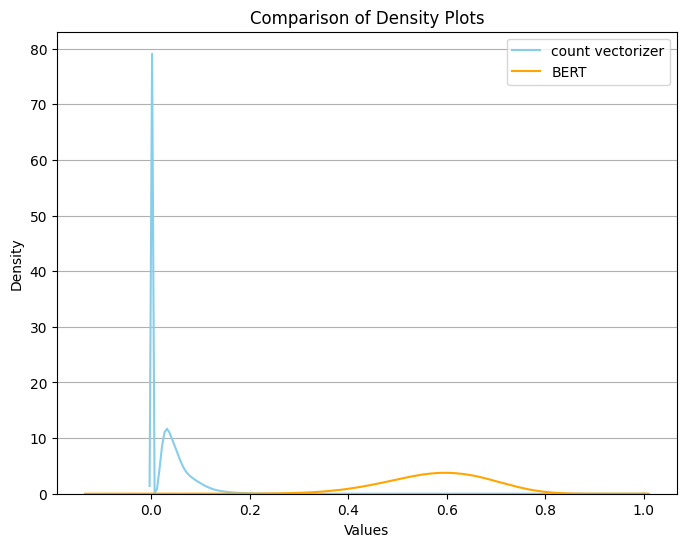

In [8]:
# Plot a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(cosine_scores_flat, color='skyblue', label='count vectorizer')
sns.kdeplot(cosine_scores_bert_flat, color='orange', label='BERT')
plt.title('Comparison of Density Plots')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y')
plt.show()

**Determine the threshold for cosine similarity scores to decide whether to recommend or not.**

In [14]:
percentile_90 = np.percentile(cosine_scores_bert_flat, 90)
print(percentile_90)

0.7116745710372925


**Predict on the train set**

In [18]:
#find all the liked movies in train set, for all similar movies > threshold, recommend
cbf_train = train[['Reviewer', 'Movie', 'recommend']]
train_liked_movies = cbf_train[cbf_train['recommend'] == 1].drop_duplicates(subset = ['Movie'])['Movie'].tolist()

all_similar_movies = []
for movie in train_liked_movies:
  curr_movie_index = unique_movies.index[unique_movies['Movie'] == movie][0]
  for index, element in enumerate(cosine_scores_bert[curr_movie_index]):
    if (element > percentile_90):
      sim_movie = unique_movies.iloc[index]['Movie']
      all_similar_movies.append(sim_movie)
all_similar_movies = list(set(all_similar_movies))

def assign_value(a):
  if a in all_similar_movies:
    return 1
  else:
    return 0

cbf_train['pred'] = cbf_train['Movie'].apply(lambda x: assign_value(x))

In [19]:
precision_cbf = precision_at_k(rating_pred = cbf_train[['Reviewer', 'Movie', 'pred']], rating_true = cbf_train[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'pred')
print(f'Precision: {precision_cbf}')

# Recall
recall_cbf = recall_at_k(rating_pred = cbf_train[['Reviewer', 'Movie', 'pred']], rating_true = cbf_train[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'pred')
print(f'Recall: {recall_cbf}')


#F1 score
f1_cbf = 2 * (precision_cbf * recall_cbf) / (precision_cbf + recall_cbf) if (precision_cbf + recall_cbf) > 0 else 0
print(f'F1 Score: {f1_cbf}')

Precision: 0.5638706858890344
Recall: 0.7299111480214159
F1 Score: 0.6362363249898215


**Predict on the test set.**

In [16]:
#find all the liked movies in test set, for all similar movies > threshold, recommend
cbf_test = test[['Reviewer', 'Movie', 'recommend']]
test_liked_movies = cbf_test[cbf_test['recommend'] == 1].drop_duplicates(subset = ['Movie'])['Movie'].tolist()

all_similar_movies = []
for movie in test_liked_movies:
  curr_movie_index = unique_movies.index[unique_movies['Movie'] == movie][0]
  for index, element in enumerate(cosine_scores_bert[curr_movie_index]):
    if (element > percentile_90):
      sim_movie = unique_movies.iloc[index]['Movie']
      all_similar_movies.append(sim_movie)
all_similar_movies = list(set(all_similar_movies))

def assign_value(a):
  if a in all_similar_movies:
    return 1
  else:
    return 0

cbf_test['pred'] = cbf_test['Movie'].apply(lambda x: assign_value(x))

In [17]:
precision_cbf = precision_at_k(rating_pred = cbf_test[['Reviewer', 'Movie', 'pred']], rating_true = cbf_test[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'pred')
print(f'Precision: {precision_cbf}')

# Recall
recall_cbf = recall_at_k(rating_pred = cbf_test[['Reviewer', 'Movie', 'pred']], rating_true = cbf_test[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'pred')
print(f'Recall: {recall_cbf}')

#F1 score
f1_cbf = 2 * (precision_cbf * recall_cbf) / (precision_cbf + recall_cbf) if (precision_cbf + recall_cbf) > 0 else 0
print(f'F1 Score: {f1_cbf}')

Precision: 0.5186872586872587
Recall: 0.8166034911439519
F1 Score: 0.6344113839018845


**Recommending top 10 movies using content based filtering**

In [17]:
#content based filtering method
def recommend_movies(movie, cosine_scores, unique_movies, top_n=10):
    movie_index = unique_movies[unique_movies['Movie'] == movie].index[0]
    sim_scores = list(enumerate(cosine_scores[movie_index]))
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get top n similar movies (excluding the input movie itself)
    top_movies = sim_scores[1:top_n + 1]

    # Extract movie titles from indices
    recommended_movies = [(unique_movies.iloc[i]['Movie'], cosine_scores[movie_index][i]) for i, _ in top_movies]

    return recommended_movies

In [18]:
#test content based filtering
recommended_movies = recommend_movies('INTERSTELLAR', cosine_scores_bert, unique_movies)
print(pd.DataFrame(recommended_movies, columns = ['Movie', 'Cosine_Scores_Bert']))

                           Movie  Cosine_Scores_Bert
0                     PROMETHEUS            0.866442
1               STAR TREK BEYOND            0.856962
2                RATCHET & CLANK            0.841058
3        APPROACHING THE UNKNOWN            0.834513
4   ROGUE ONE: A STAR WARS STORY            0.828726
5                 FANTASTIC FOUR            0.828568
6            ABSOLUTELY ANYTHING            0.823955
7  STARSHIP TROOPERS 3: MARAUDER            0.820990
8                       IRON SKY            0.820149
9                           LIFE            0.820113


# **Collaborative filtering using SVD**

**Train SVD model and make predictions**

In [20]:
#prepare training set
rating_scale = (train['Score'].min(), train['Score'].max())
reader = Reader(rating_scale=rating_scale)
svd_train = Dataset.load_from_df(train[['Reviewer', 'Movie', 'Score']], reader).build_full_trainset()

In [21]:
#train svd
svd = SVD(random_state=42, n_factors=200, n_epochs=30, verbose=True)
svd.fit(svd_train)

testset = list(test[['Reviewer', 'Movie', 'Score']].apply(tuple, axis=1))
test_predictions = svd.test(testset)

trainset = list(train[['Reviewer', 'Movie', 'Score']].apply(tuple, axis = 1))
train_predictions = svd.test(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


**Predict on train set and test set**

In [22]:
# Evaluation of SVD Model
def rating_grouping(rating):
    if (rating > 0.797980):
        return 1
    else:
        return 0

real_user_ratings_train = pd.DataFrame([(pred.uid, pred.iid, rating_grouping(pred.r_ui)) for pred in train_predictions], columns=['Reviewer', 'Movie', 'Actual_Rating'])
predicted_ratings_train = pd.DataFrame([(pred.uid, pred.iid, rating_grouping(pred.est)) for pred in train_predictions], columns=['Reviewer', 'Movie', 'Predicted_Rating'])
# Extract true and predicted ratings from the predictions
real_user_ratings_test = pd.DataFrame([(pred.uid, pred.iid, rating_grouping(pred.r_ui)) for pred in test_predictions], columns=['Reviewer', 'Movie', 'Actual_Rating'])
predicted_ratings_test = pd.DataFrame([(pred.uid, pred.iid, rating_grouping(pred.est)) for pred in test_predictions], columns=['Reviewer', 'Movie', 'Predicted_Rating'])

# Precision
precision = precision_at_k(rating_pred = predicted_ratings_train, rating_true = real_user_ratings_train, k = 10, col_user='Reviewer', col_item='Movie', col_rating='Actual_Rating', col_prediction = 'Predicted_Rating')
print(f'Precision (train): {precision}')

# Recall
recall = recall_at_k(rating_pred = predicted_ratings_train, rating_true = real_user_ratings_train, k = 10, col_user='Reviewer', col_item='Movie', col_rating='Actual_Rating', col_prediction = 'Predicted_Rating')
print(f'Recall (train): {recall}')

#F1 score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'F1 Score (train): {f1}')

# Precision
precision = precision_at_k(rating_pred = predicted_ratings_test, rating_true = real_user_ratings_test, k = 10, col_user='Reviewer', col_item='Movie', col_rating='Actual_Rating', col_prediction = 'Predicted_Rating')
print(f'Precision (test): {precision}')

# Recall
recall = recall_at_k(rating_pred = predicted_ratings_test, rating_true = real_user_ratings_test, k = 10, col_user='Reviewer', col_item='Movie', col_rating='Actual_Rating', col_prediction = 'Predicted_Rating')
print(f'Recall (test): {recall}')

#F1 score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'F1 Score (test): {f1}')

Precision (train): 0.5642420270860639
Recall (train): 0.7299239653203425
F1 Score (train): 0.6364775156009719
Precision (test): 0.5186486486486487
Recall (test): 0.8165973886266172
F1 Score (test): 0.6343806613580666


# **Hybrid Recommendation System**

## **Use stacking ensemble method**


*   Build a new train set and test set from predictions by content based filtering and collaborative filtering
*   train a random forest classifier



In [23]:
new_training_set = np.column_stack([cbf_train['pred'], [pred.est for pred in train_predictions], cbf_train['recommend']])
new_test_set = np.column_stack([cbf_test['pred'], [pred.est for pred in test_predictions], cbf_test['recommend']])

In [24]:
rf_classifier = RandomForestClassifier(random_state = 42)
X_train = new_training_set[:, :-1]
y_train = new_training_set[:,-1]
X_test = new_test_set[:, :-1]
y_test = new_test_set[:, -1]
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predict on train set and test set**

In [25]:
train_pred = rf_classifier.predict(X_train)
test_pred = rf_classifier.predict(X_test)

train_pred = pd.DataFrame(train_pred, columns=['Predicted_Label'])
test_pred = pd.DataFrame(test_pred, columns=['Predicted_Label'])

train_pred = pd.concat([train, train_pred], axis=1)
test_pred = pd.concat([test, test_pred], axis = 1)

In [26]:
# Precision
precision = precision_at_k(rating_pred = train_pred[['Reviewer', 'Movie', 'Predicted_Label']], rating_true = train_pred[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'Predicted_Label')
print(f'Precision (train): {precision}')

# Recall
recall = recall_at_k(rating_pred = train_pred[['Reviewer', 'Movie', 'Predicted_Label']], rating_true = train_pred[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'Predicted_Label')
print(f'Recall (train): {recall}')

#F1 score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'F1 Score (train): {f1}')

# Precision
precision = precision_at_k(rating_pred = test_pred[['Reviewer', 'Movie', 'Predicted_Label']], rating_true = test_pred[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'Predicted_Label')
print(f'Precision (test): {precision}')

# Recall
recall = recall_at_k(rating_pred = test_pred[['Reviewer', 'Movie', 'Predicted_Label']], rating_true = test_pred[['Reviewer', 'Movie', 'recommend']], k = 10, col_user='Reviewer', col_item='Movie', col_rating='recommend', col_prediction = 'Predicted_Label')
print(f'Recall (test): {recall}')


#F1 score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'F1 Score (test): {f1}')

Precision (train): 0.5637693819611269
Recall (train): 0.7297266132945285
F1 Score (train): 0.6361017324933136
Precision (test): 0.5185256657661135
Recall (test): 0.8162933845521005
F1 Score (test): 0.6341969281670753


**Demonstrate top 10 movie recommendations using hybrid recommendation system**

In [59]:
def hybrid_recommend(user):
  all_movies_liked = data[(data['Reviewer'] == user) & (data['recommend'] == 1)]['Movie'].tolist()
  all_similar_movies = []
  for movie in all_movies_liked:
    curr_movie_index = unique_movies.index[unique_movies['Movie'] == movie][0]
    for index, element in enumerate(cosine_scores_bert[curr_movie_index]):
      if (element > percentile_90):
        sim_movie = unique_movies.iloc[index]['Movie']
        all_similar_movies.append(sim_movie)
  all_similar_movies = list(set(all_similar_movies))
  svd_predictions = [svd.predict(user,x).est for x in all_similar_movies]
  all_similar_movies = pd.DataFrame(all_similar_movies, columns = ['Movie'])
  all_similar_movies['recommend'] = 1
  final = []
  reccs = rf_classifier.predict(np.column_stack([all_similar_movies['recommend'], svd_predictions]))
  for id, recc in enumerate(reccs):
    if recc == 1:
      final.append(all_similar_movies.iloc[id]['Movie'])
  final = pd.DataFrame(final[:10], columns = ['Movie'])
  final['Overview'] = final['Movie'].apply(lambda x: unique_movies[unique_movies['Movie'] == x]['overview'].tolist()[0])
  final['Directors'] = final['Movie'].apply(lambda x: unique_movies[unique_movies['Movie'] == x]['director_list'].tolist()[0])
  final['Cast'] = final['Movie'].apply(lambda x: unique_movies[unique_movies['Movie'] == x]['first_three_casts'].tolist()[0])
  final['Genres'] = final['Movie'].apply(lambda x: unique_movies[unique_movies['Movie'] == x]['unique_genres'].tolist()[0])
  return final


In [61]:
hybrid_recommend('Dennis Schwartz')

,Movie,Overview,Directors,Cast,Genres
0,GRAVITY,"Dr. Ryan Stone, a brilliant medical engineer o...",[Alfonso Cuarón],"[Sandra Bullock, George Clooney, Ed Harris]","[Drama, Science Fiction, Thriller]"
1,MAGIC MIKE,"Mike, an experienced stripper, takes a younger...",[Steven Soderbergh],"[Channing Tatum, Matthew McConaughey, Alex Pet...","[Drama, Comedy]"
2,ANVIL! THE STORY OF ANVIL,"At 14, best friends Robb Reiner and Lips made ...",[Sacha Gervasi],"[Steve 'Lips' Kudlow, Robb Reiner, Kevin Goocher]","[Music, Documentary]"
3,RIDE THE PINK HORSE,"In the border town of San Pablo, preparing for...",[Robert Montgomery],"[Robert Montgomery, Wanda Hendrix, Andrea King]","[Drama, Thriller, Mystery]"
4,THE 24 HOUR WAR,"In the early 1960s, Henry Ford II and Enzo Fer...","[Adam Carolla, Nate Adams]","[Mario Andretti, Bob Bondurant, Ralph Nader]",[Documentary]
5,CLOUDBURST,When Dot (Brenda Fricker)'s granddaughter puts...,[Thom Fitzgerald],"[Olympia Dukakis, Brenda Fricker, John Dunsworth]","[Foreign, Comedy, Thriller, Drama, Adventure]"
6,FOR THOSE IN PERIL,"Aaron, a young misfit living in a remote Scott...",[Paul Wright],"[George MacKay, Michael Smiley, Nichola Burley]",[Drama]
7,THE GRAND BUDAPEST HOTEL,The Grand Budapest Hotel tells of a legendary ...,[Wes Anderson],"[Ralph Fiennes, Tony Revolori, F. Murray Abraham]","[Drama, Comedy]"
8,SARAH SILVERMAN: WE ARE MIRACLES,"In her first-ever HBO solo special, Sarah Silv...",[Liam Lynch],"[Sarah Silverman, Mike G., Daniel Steven Gonza...",[Comedy]
9,FRANKENSTEIN,"After he is artificially created, then left fo...",[Bernard Rose],"[Carrie-Anne Moss, Danny Huston, Xavier Samuel]","[Thriller, Horror]"
